# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.


In [4]:



import pandas as pd

df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
df.head()
#The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns
df.info()
#The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
df["flight_day"].unique()
df.describe()
#The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.



,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.


Counts:
booking_complete
0    42522
1     7478
Name: count, dtype: int64

Percentages:
booking_complete
0    85.04
1    14.96
Name: proportion, dtype: float64


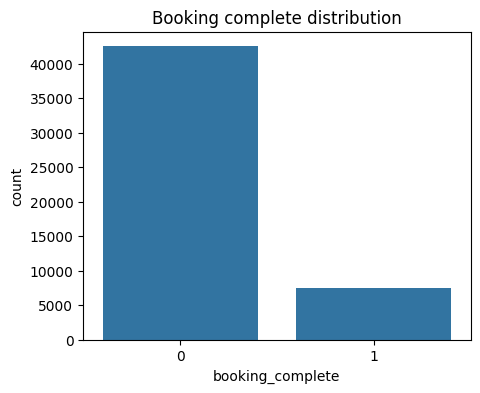

Majority class: 0, Baseline accuracy: 0.850


In [6]:
# Step 1: target distribution and baseline
import matplotlib.pyplot as plt
import seaborn as sns

# distribution
print("Counts:")
print(df['booking_complete'].value_counts())
print("\nPercentages:")
print((df['booking_complete'].value_counts(normalize=True) * 100).round(2))

# plot
plt.figure(figsize=(5,4))
sns.countplot(x='booking_complete', data=df)
plt.title('Booking complete distribution')
plt.xlabel('booking_complete')
plt.ylabel('count')
plt.show()

# baseline (majority class) accuracy
majority_class = df['booking_complete'].mode()[0]
baseline_acc = (df['booking_complete'] == majority_class).mean()
print(f"Majority class: {majority_class}, Baseline accuracy: {baseline_acc:.3f}")


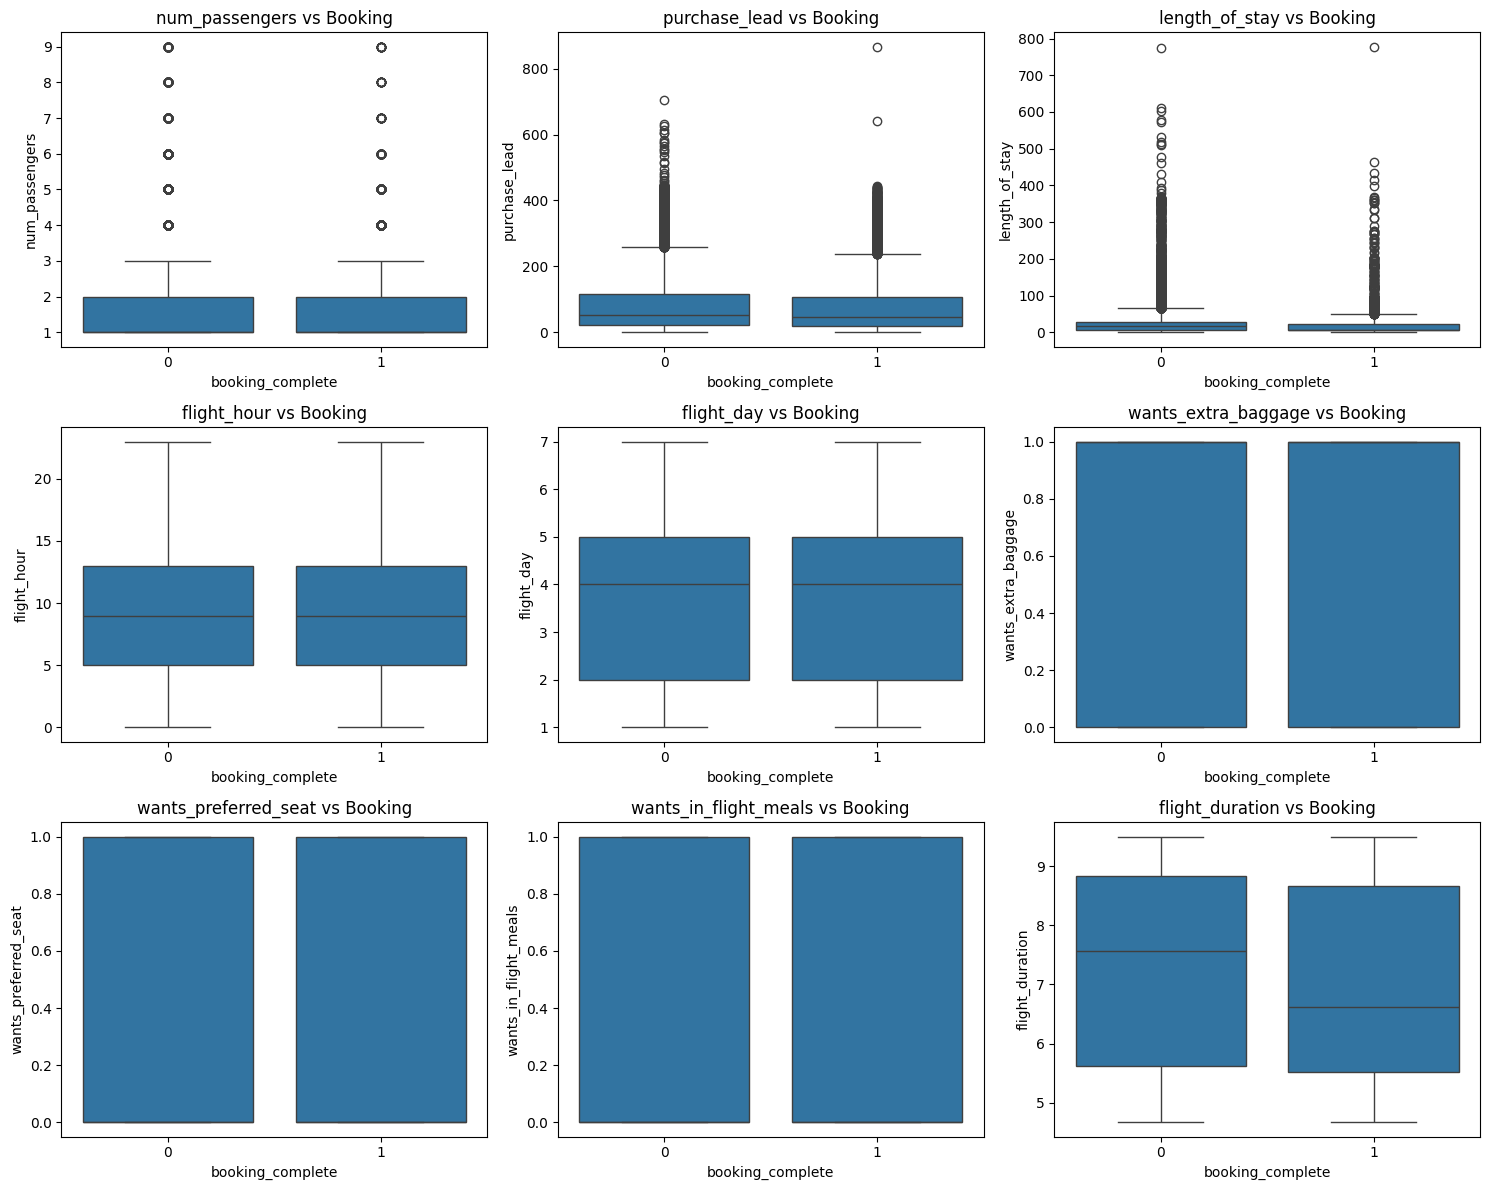

In [7]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop('booking_complete')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='booking_complete', y=col, data=df)
    plt.title(f'{col} vs Booking')
plt.tight_layout()
plt.show()


In [8]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    display(df.groupby(col)['booking_complete'].mean().sort_values(ascending=False))



Column: sales_channel


,booking_complete
sales_channel,
Internet,0.154770
Mobile,0.108402



Column: trip_type


,booking_complete
trip_type,
RoundTrip,0.150575
OneWay,0.051680
CircleTrip,0.043103



Column: route


,booking_complete
route,
AORPER,1.0
MELNRT,1.0
KOSSYD,1.0
KCHMRU,1.0
KTMURT,1.0
...,...
HNDOOL,0.0
HNDMLE,0.0
HNDMAA,0.0



Column: booking_origin


,booking_complete
booking_origin,
Iraq,1.000000
Vanuatu,1.000000
Seychelles,1.000000
Pakistan,1.000000
Kazakhstan,0.666667
...,...
Svalbard & Jan Mayen,0.000000
Tonga,0.000000
Timor-Leste,0.000000


In [9]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode low-cardinality categorical columns
low_card_cols = ['sales_channel', 'trip_type', 'flight_day']
df_encoded = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

# Frequency encode high-cardinality columns
for col in ['route', 'booking_origin']:
    freq = df[col].value_counts()
    df_encoded[col + '_freq'] = df[col].map(freq)

# Drop original high-cardinality columns
df_encoded.drop(['route', 'booking_origin'], axis=1, inplace=True)

df_encoded.head()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_2,flight_day_3,flight_day_4,flight_day_5,flight_day_6,flight_day_7,route_freq,booking_origin_freq
0,2,262,19,7,1,0,0,5.52,0,False,False,True,False,False,False,False,True,False,20,1074
1,1,112,20,3,0,0,0,5.52,0,False,False,True,False,False,False,False,True,False,20,1074
2,2,243,22,17,1,1,0,5.52,0,False,False,True,False,True,False,False,False,False,20,1270
3,1,96,31,4,0,0,1,5.52,0,False,False,True,False,False,False,False,True,False,20,1074
4,2,68,22,15,1,0,1,5.52,0,False,False,True,False,True,False,False,False,False,20,1270


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train with cross-validation
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
f1_scores_smote = cross_val_score(rf_smote, X_resampled, y_resampled, cv=5, scoring='f1')

print("SMOTE F1 scores:", f1_scores_smote)
print("Average SMOTE F1:", f1_scores_smote.mean())



SMOTE F1 scores: [0.54166079 0.89390791 0.83015199 0.68939521 0.69030151]
Average SMOTE F1: 0.7290834821310588


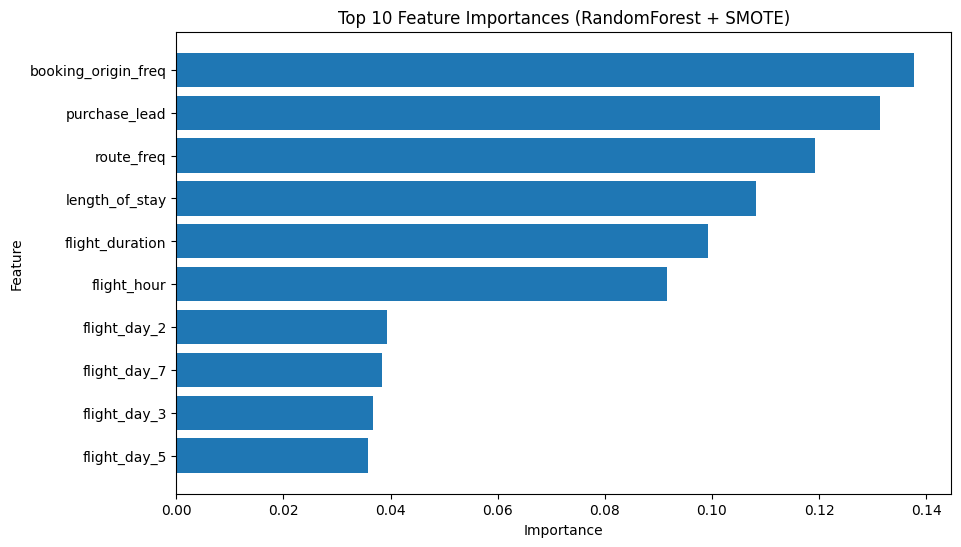

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model on the resampled data
rf_smote.fit(X_resampled, y_resampled)

# Get feature importances
importances = rf_smote.feature_importances_
feature_names = X.columns  # Same column order as in your X DataFrame

# Create a DataFrame for easy sorting
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (RandomForest + SMOTE)')
plt.show()